# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(filec_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')
    
# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [11]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.11199999749660491


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

# Importing Modules

In [2]:
from unityagents import UnityEnvironment

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from  collections  import deque
from itertools import count
import torch
import time

import numpy as np
import random
import copy
from collections import namedtuple, deque

import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
%matplotlib inline

from agent_2 import Agent

# Defining Environment and Agent

In [3]:
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)

# size of each action
action_size = brain.vector_action_space_size

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]

agent = Agent(state_size=state_size, action_size=action_size, random_seed=8)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


# Creating Function for Agent

In [4]:
def ddpg_agent(n_episodes=1000, max_time=1000, max_len=100):
    # create empty score list
    scores = []
    # initialize deque
    scores_deque = deque(maxlen=max_len)
    
    # Iterate over episodes 
    for ep in range(1,n_episodes+1):     
        # Claculation Timer
        if ep==1: 
            time_start=time.time()
            
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        
        # Iterate over timesteps
        for t in range(max_time):
            actions = agent.act(states)
            # send all actions to the environment
            env_info = env.step(actions)[brain_name]
            # get next state (for each agent)
            next_states = env_info.vector_observations
            # get reward (for each agent)
            rewards = env_info.rewards
            # see if episode finished
            dones = env_info.local_done
            
            # Add Trajectory's
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            
            # Defining next States and rewards     
            states = next_states
            score += rewards
            if np.any(dones):
                break 
                       
        
        # Append Scores
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))  
        
        # Print Means each episode
        print('\rEpisode: {}  Mean_Score for all Agents: {:.2f}  Mean_Score_over_deque: {:.2f}'.format(ep, np.mean(score), np.mean(scores_deque)))  
        # Print Calculation Time each 5 Episode
        if ep % 5==0:
            time_end=round((time.time()-time_start)/60) 
            print('Time of Calucation: {} Minutes'.format(time_end))
            
        # Defining rubric-conditions: mean_score (over deque) over 30 in minimum of 100 episodes
        if np.mean(scores_deque) >= 30 and ep>100:
            print('\nEnvironment solved in {} episodes with a mean score of {} - Finally :-) !'.format(ep, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'actor_checkpoint.pth')
            torch.save(agent.critic_local.state_dict(), 'critic_checkpoint.pth')
            break
            
    return scores

In [5]:
scores = ddpg_agent()

Episode: 1  Mean_Score for all Agents: 0.73  Mean_Score_over_deque: 0.73
Episode: 2  Mean_Score for all Agents: 1.62  Mean_Score_over_deque: 1.17
Episode: 3  Mean_Score for all Agents: 2.95  Mean_Score_over_deque: 1.77
Episode: 4  Mean_Score for all Agents: 3.44  Mean_Score_over_deque: 2.19
Episode: 5  Mean_Score for all Agents: 3.24  Mean_Score_over_deque: 2.40
Time of Calucation: 10 Minutes
Episode: 6  Mean_Score for all Agents: 4.21  Mean_Score_over_deque: 2.70
Episode: 7  Mean_Score for all Agents: 4.24  Mean_Score_over_deque: 2.92
Episode: 8  Mean_Score for all Agents: 5.49  Mean_Score_over_deque: 3.24
Episode: 9  Mean_Score for all Agents: 6.62  Mean_Score_over_deque: 3.62
Episode: 10  Mean_Score for all Agents: 9.00  Mean_Score_over_deque: 4.16
Time of Calucation: 21 Minutes
Episode: 11  Mean_Score for all Agents: 9.00  Mean_Score_over_deque: 4.60
Episode: 12  Mean_Score for all Agents: 9.56  Mean_Score_over_deque: 5.01
Episode: 13  Mean_Score for all Agents: 11.11  Mean_Score_o

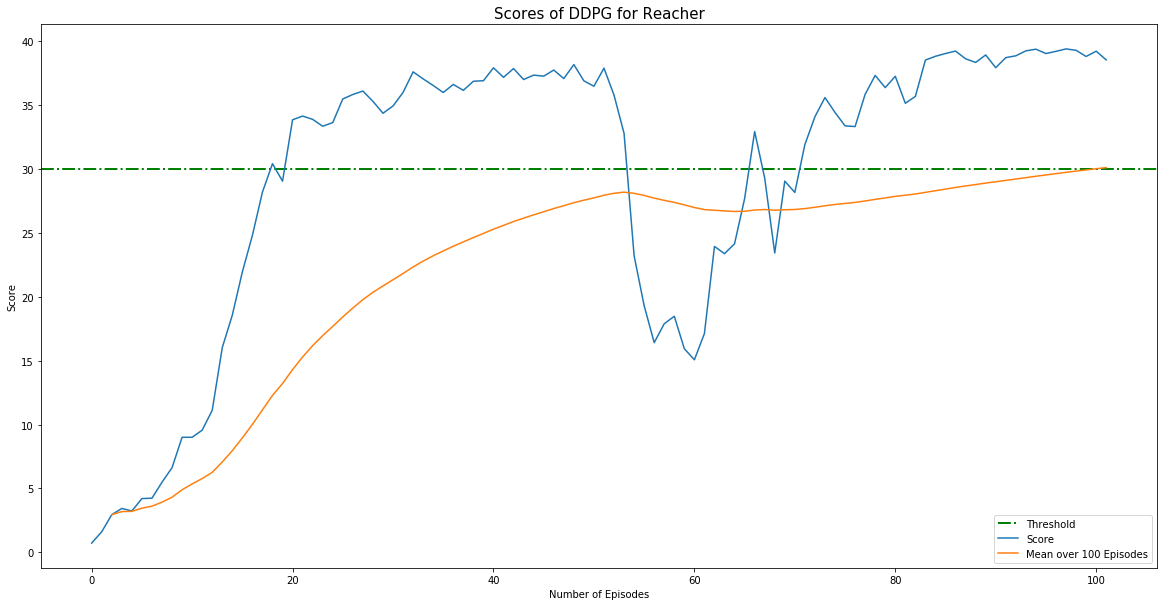

In [55]:
score_df=pd.DataFrame(scores,columns=['Mean Scores'])

plt.figure(figsize=(20,10))
plt.title('Scores of DDPG for Reacher',size=15)
plt.axhline(y=30., xmin=0.0, color='g', linestyle='dashdot', linewidth=2.0, label='Threshold')
plt.plot(score_df['Mean Scores'], label='Score')
plt.plot(score_df['Mean Scores'].iloc[2:].expanding().mean(),label='Mean over 100 Episodes')
plt.ylabel('Score')
plt.xlabel('Number of Episodes')
plt.legend(loc='lower right', fontsize=10)

In [54]:
# Saving Results 
score_df.to_csv('score.csv',sep=';')

In [6]:
env.close()